In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import numpy as np
from torchvision import datasets, transforms
import time
from PIL import Image

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
#device = torch.device("cpu")
print(device)

cuda


In [4]:
import autoencoders
import matplotlib.pyplot as plt
net = autoencoders.CNN()
checkPointPath = "./data/70-100-256-10-1/checkpoint.pth.tar"
checkpoint = torch.load(checkPointPath)
net.load_state_dict(checkpoint['state_dict'])
net.to(device)


CNN(
  (encoder): Sequential(
    (0): Conv2d(3, 16, kernel_size=(5, 5), stride=(2, 2))
    (1): ReLU()
    (2): Conv2d(16, 32, kernel_size=(5, 5), stride=(2, 2))
    (3): ReLU()
    (4): Conv2d(32, 64, kernel_size=(5, 5), stride=(2, 2))
    (5): ReLU()
    (6): Conv2d(64, 128, kernel_size=(5, 5), stride=(2, 2))
    (7): ReLU()
    (8): Conv2d(128, 256, kernel_size=(5, 5), stride=(2, 2))
    (9): ReLU()
  )
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (bottleneck): Sequential(
    (0): Linear(in_features=6400, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=16, bias=True)
    (3): ReLU()
    (4): Linear(in_features=16, out_features=512, bias=True)
    (5): ReLU()
    (6): Linear(in_features=512, out_features=6400, bias=True)
    (7): ReLU()
  )
  (unflatten): Unflatten(dim=1, unflattened_size=(256, 5, 5))
  (decoder): Sequential(
    (0): ConvTranspose2d(256, 128, kernel_size=(5, 5), stride=(2, 2))
    (1): ReLU()
    (2): ConvTranspose2d(1

<class 'numpy.ndarray'>
1.0
0.09411764705882353


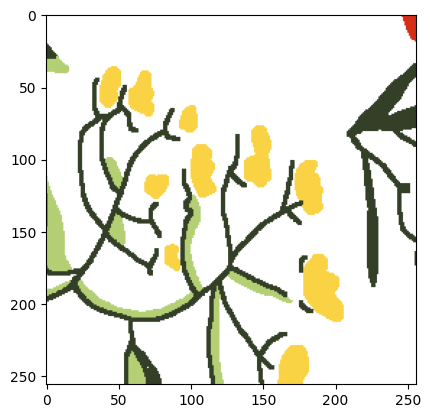

(3, 256, 256)
torch.Size([1, 3, 256, 256])
torch.Size([1, 3, 256, 256])


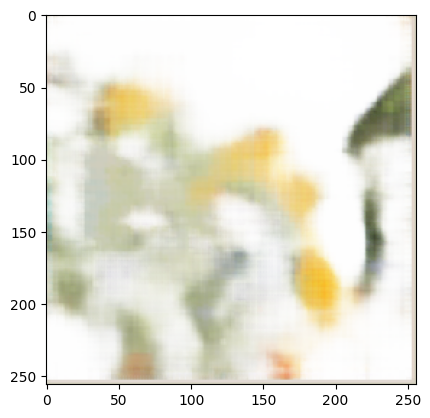

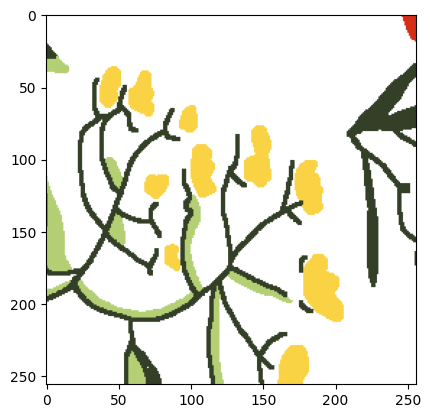

In [10]:
des = Image.open("test.png").crop((0,0,256,256))
des = np.asarray(des)/255.0
print(type(des))
print(des.max())
print(des.min())
plt.imshow(des)
plt.show()
des = des.transpose(2,0,1)
print(des.shape)
inp = torch.Tensor([des]).to(device)
print(inp.shape)
out = net(inp)
print(out.shape)
img_array = out.data.cpu().numpy()
img_array = img_array.squeeze()
img_array = img_array.transpose(1,2,0)
image = (img_array * 255).astype(np.uint8)
image = Image.fromarray(image)
plt.imshow(image)
plt.show()
plt.imshow(des.transpose(1,2,0))
plt.show()


torch.Size([1, 3, 256, 256])
torch.Size([1, 3, 256, 256])
(3, 256, 256)


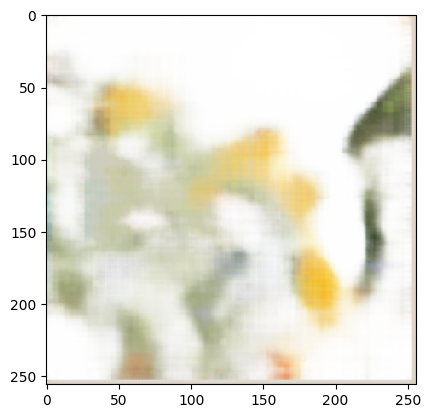

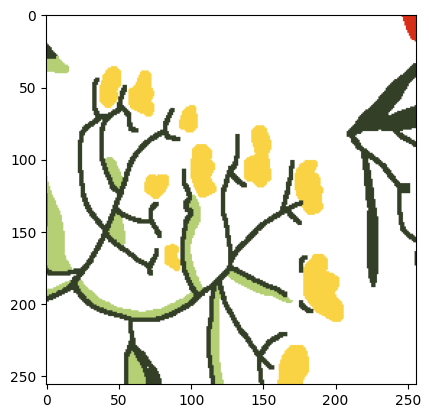

In [16]:
from torchvision import transforms

des = Image.open("test.png").crop((0,0,256,256))
transform = transforms.Compose([transforms.ToTensor()])
des = transform(des).view(1,3,256,256).to(device)
print(des.shape)
sigmoid = torch.nn.Sigmoid()
out = net(des)
print(out.shape)
#out = sigmoid(out)
img_array = out.data.cpu().numpy()
img_array = img_array.squeeze()
print(img_array.shape)
img_array = img_array.transpose(1,2,0)
image = (img_array * 255).astype(np.uint8)
image = Image.fromarray(image)
image.save("output.png")
plt.imshow(image)
plt.show()
plt.imshow(des.data.cpu().numpy().squeeze().transpose(1,2,0))
plt.show()

